In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('mcdonalds.csv')

In [3]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [4]:
df.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [6]:
df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [7]:
# Remove Duplicate data points(Records)
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(1431, 15)

In [9]:
#Checking for the count of below variables
df['Gender'].value_counts()
df['VisitFrequency'].value_counts()
df['Like'].value_counts()

Like
+3              225
+2              180
0               168
+4              156
+1              152
I hate it!-5    150
I love it!+5    140
-3               73
-4               70
-2               59
-1               58
Name: count, dtype: int64

In [10]:
MD_x = (df.iloc[:, :11] == "Yes").astype(int)
col_means = np.round(MD_x.mean(), 2)
print(col_means)

yummy         0.55
convenient    0.91
spicy         0.10
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


# EDA

### Customer Segmentation Based on Socio-demographis

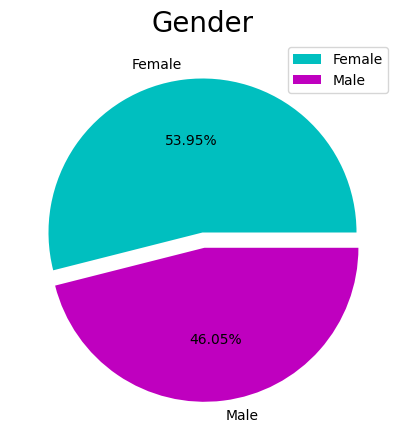

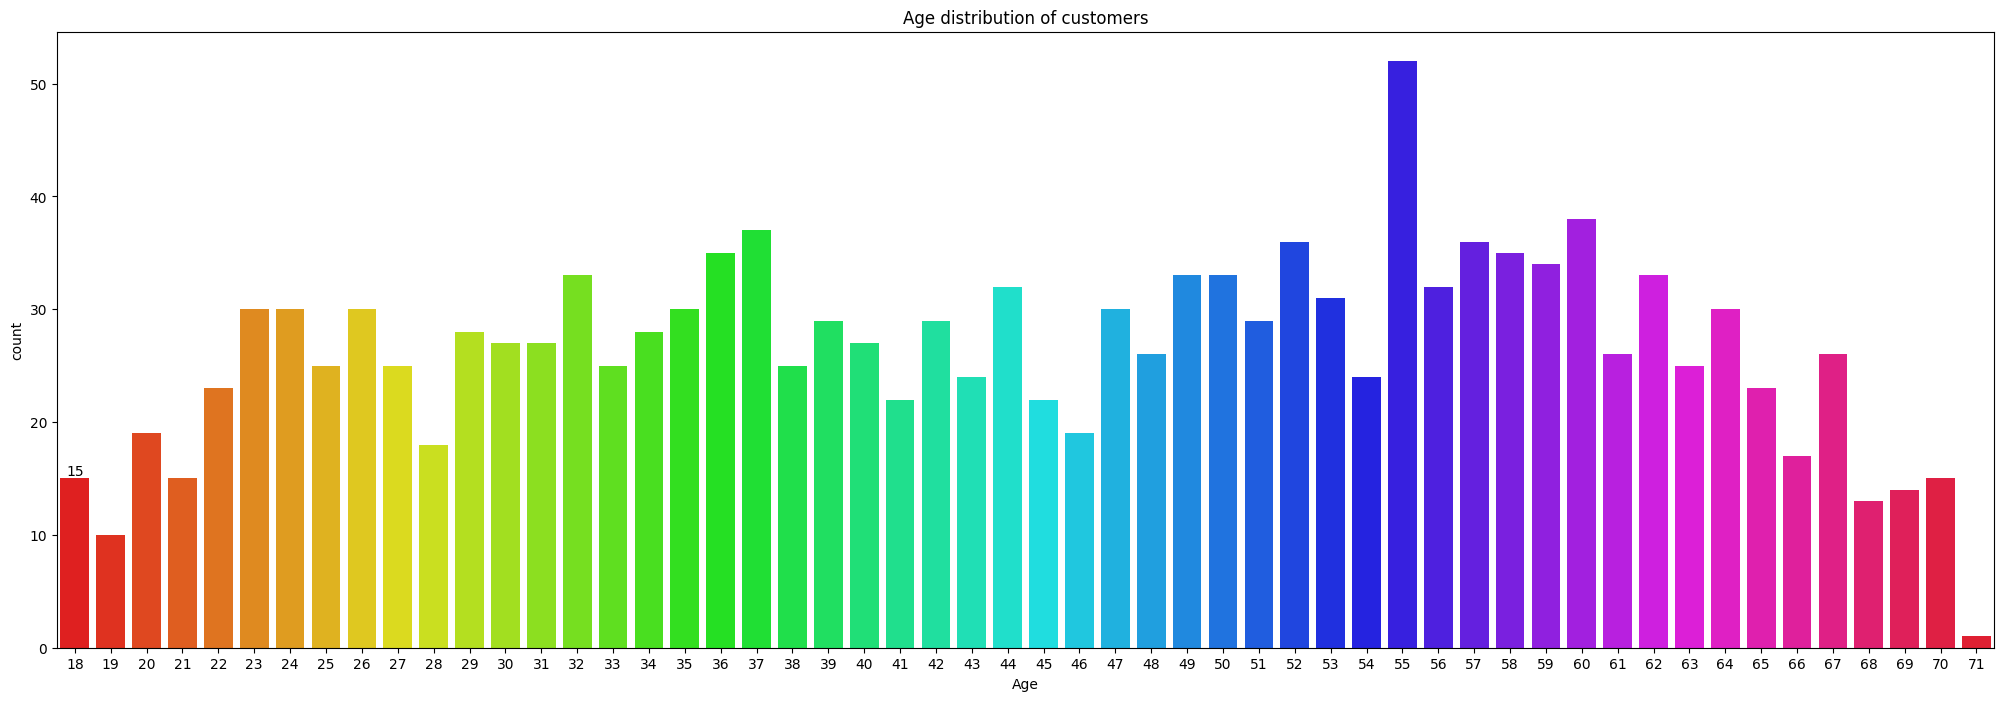

In [11]:
#Gender
labels = ['Female', 'Male']
size = df['Gender'].value_counts()
colors = ['c', 'm']
explode = [0, 0.1]
plt.rcParams['figure.figsize'] = (5, 5)
plt.pie(size, colors = colors, explode = explode, 
        labels = labels, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()
#we infer that there are more female customers than male.

#Age
plt.rcParams['figure.figsize'] = (25, 8)
f = sns.countplot(x=df['Age'], hue=df['Age'], legend=False ,palette = 'hsv')
f.bar_label(f.containers[0])
plt.title('Age distribution of customers')
plt.show()
# Mcdonalds recieve more customers of age between 50-60 and 35-40.

### Customer Segmentation  based on Pyschographic Segmentation

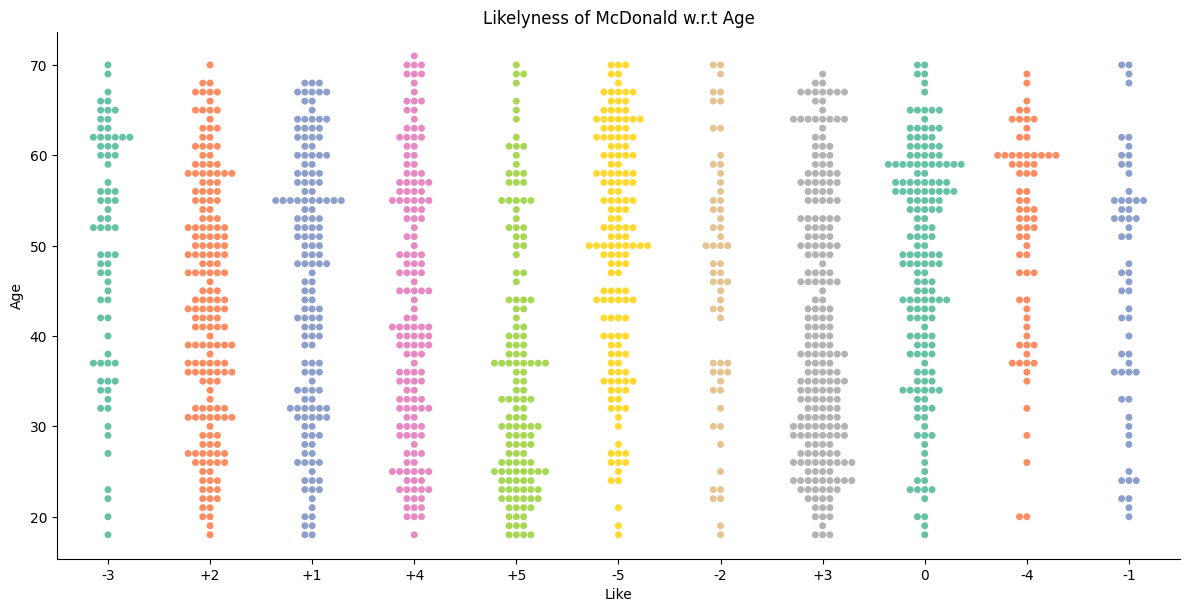

In [12]:
df['Like']= df['Like'].replace({'I hate it!-5': '-5','I love it!+5':'+5'})
#Like 
sns.catplot(x="Like", y="Age",data=df, hue="Like",
            orient="v", height= 6, aspect= 2, palette="Set2",kind="swarm")
plt.title('Likelyness of McDonald w.r.t Age')
plt.show()

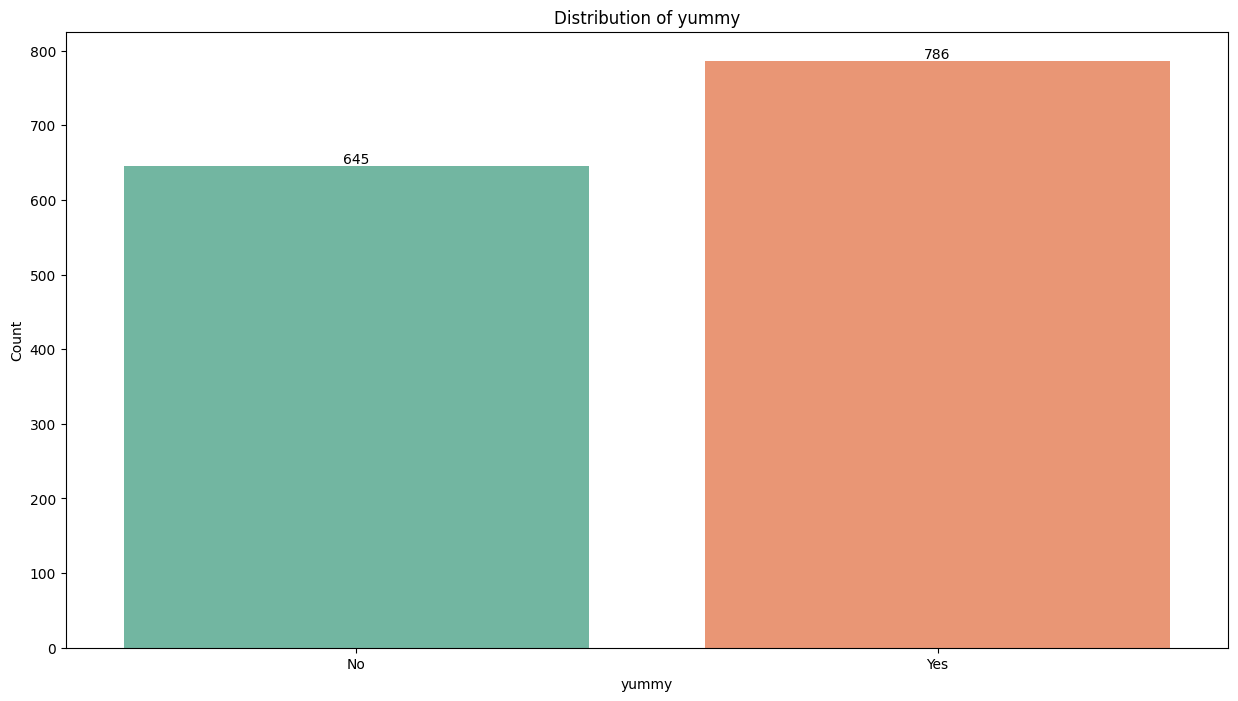

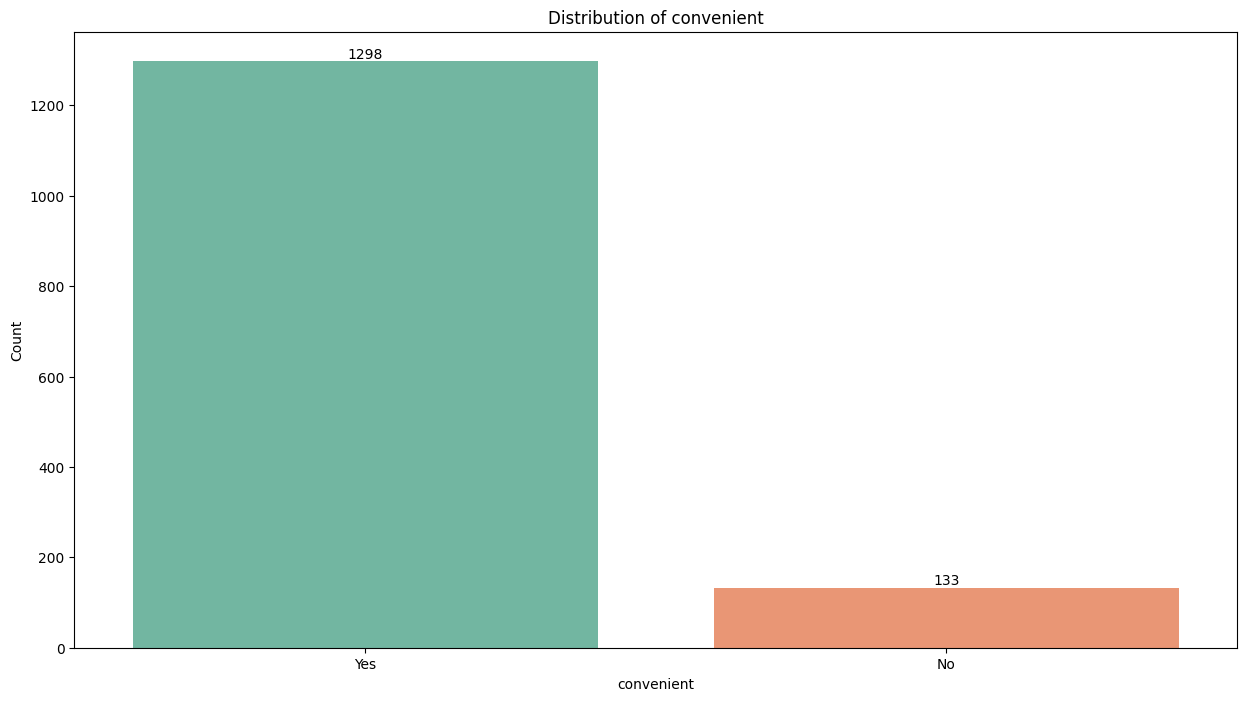

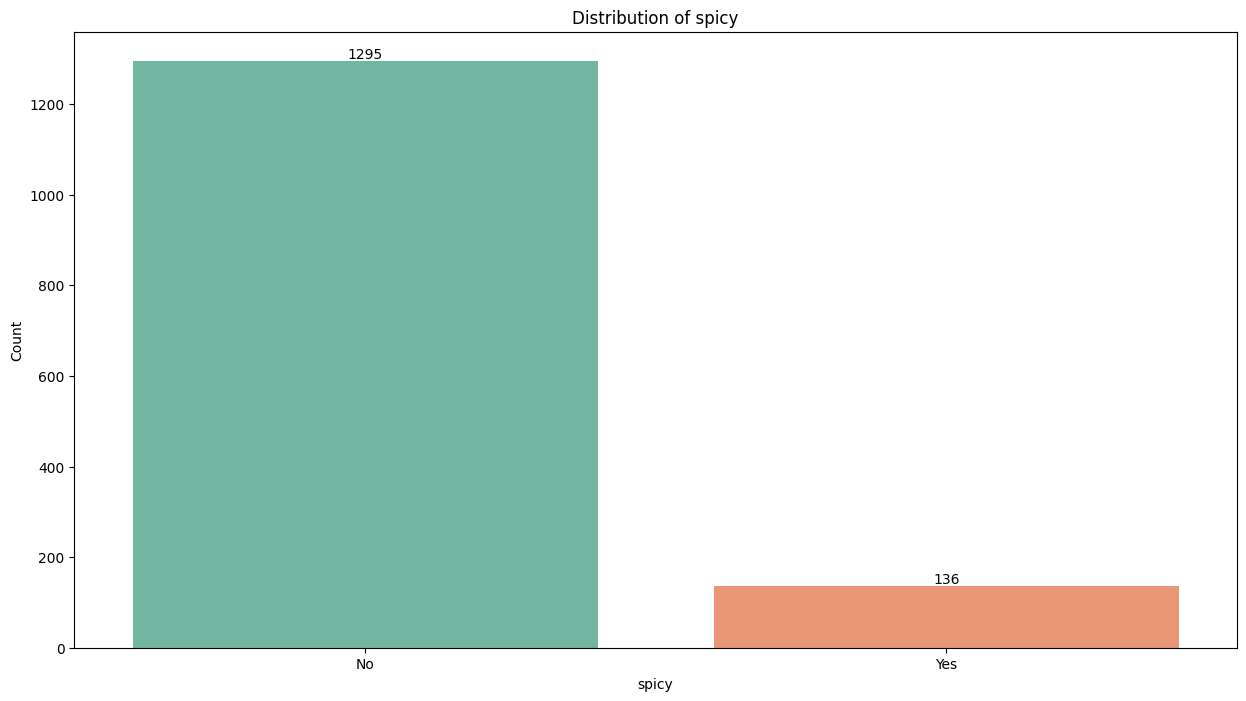

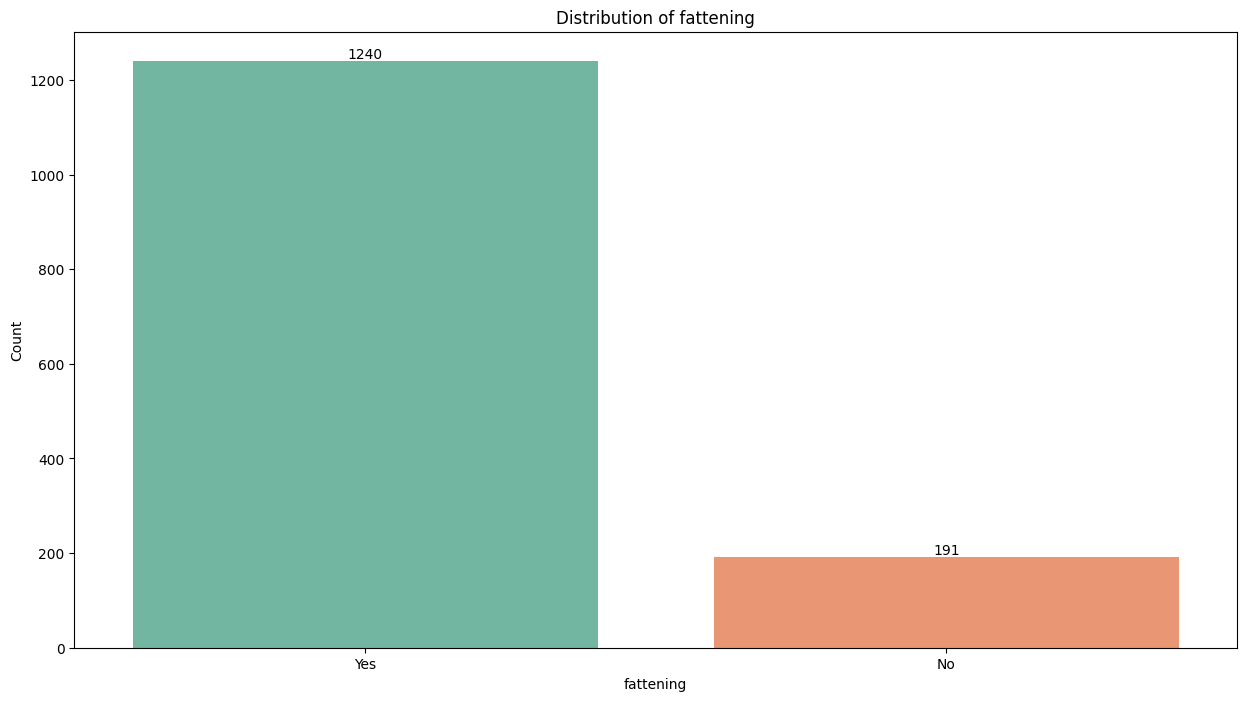

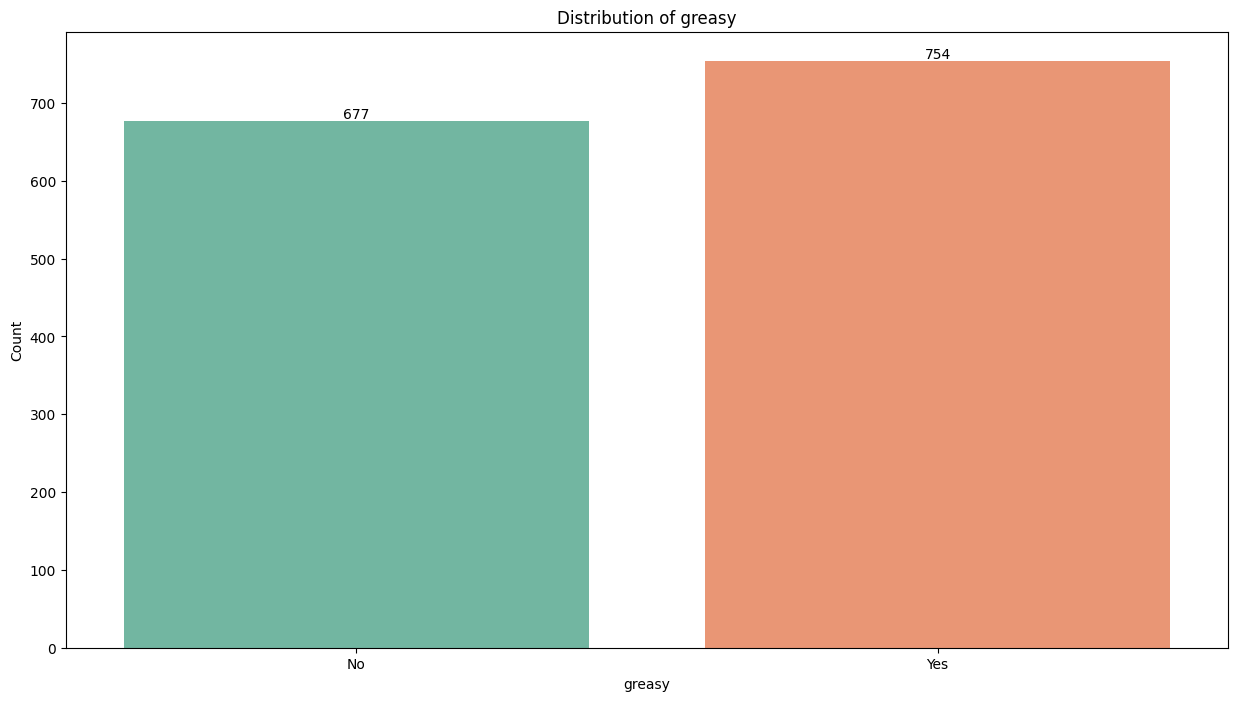

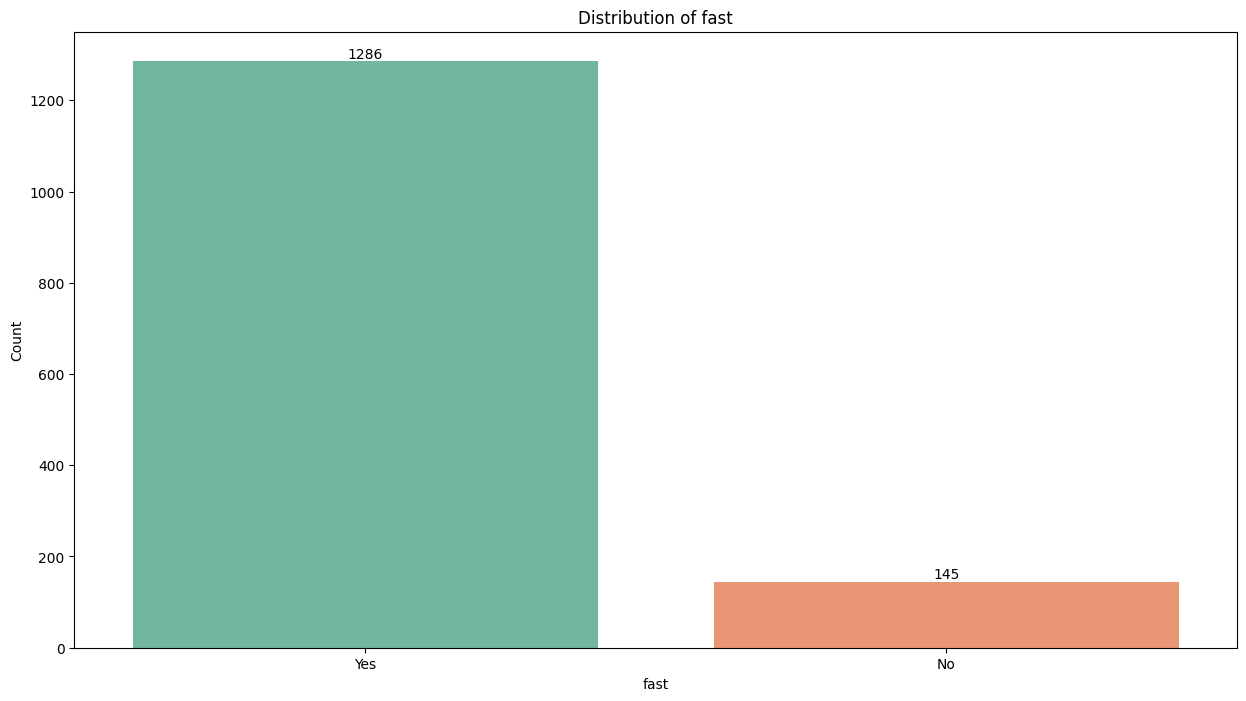

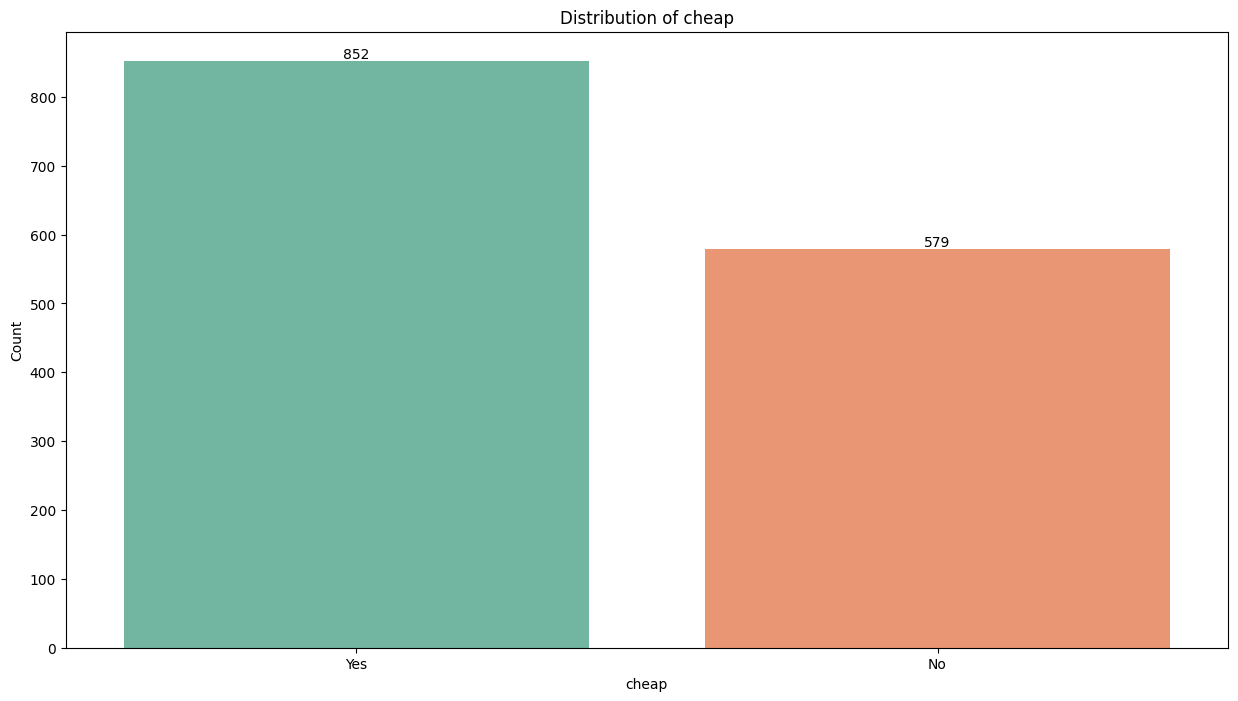

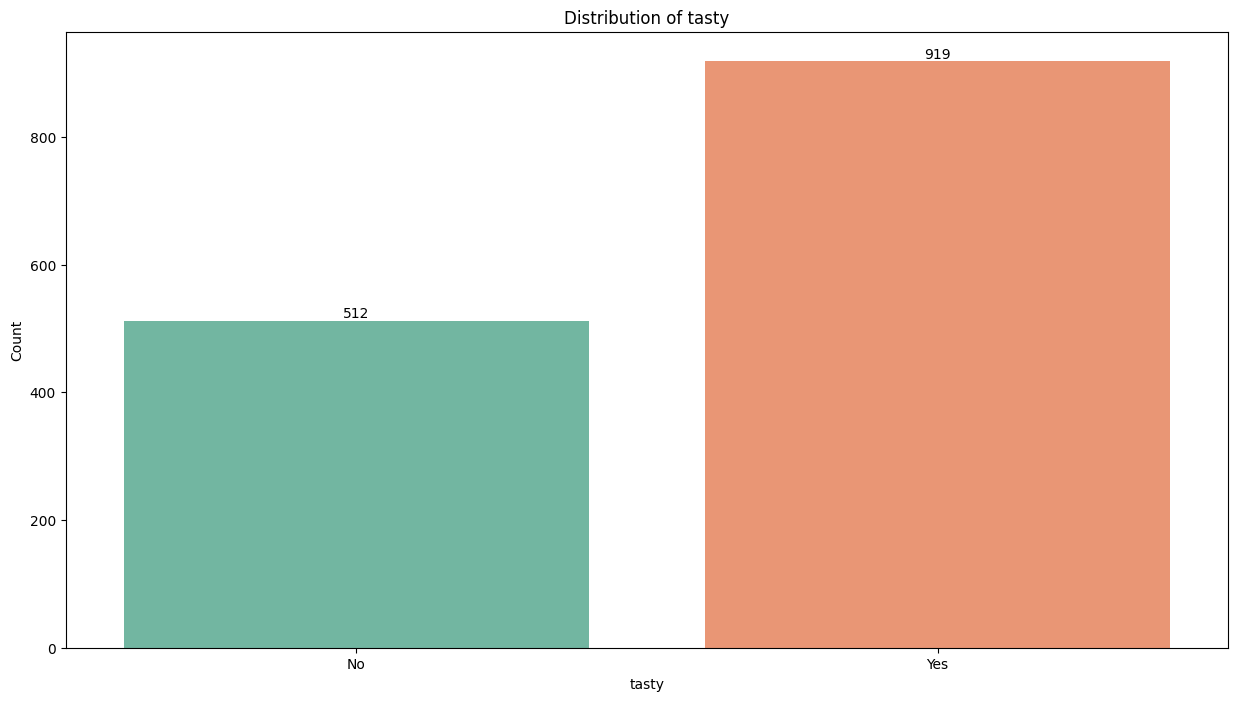

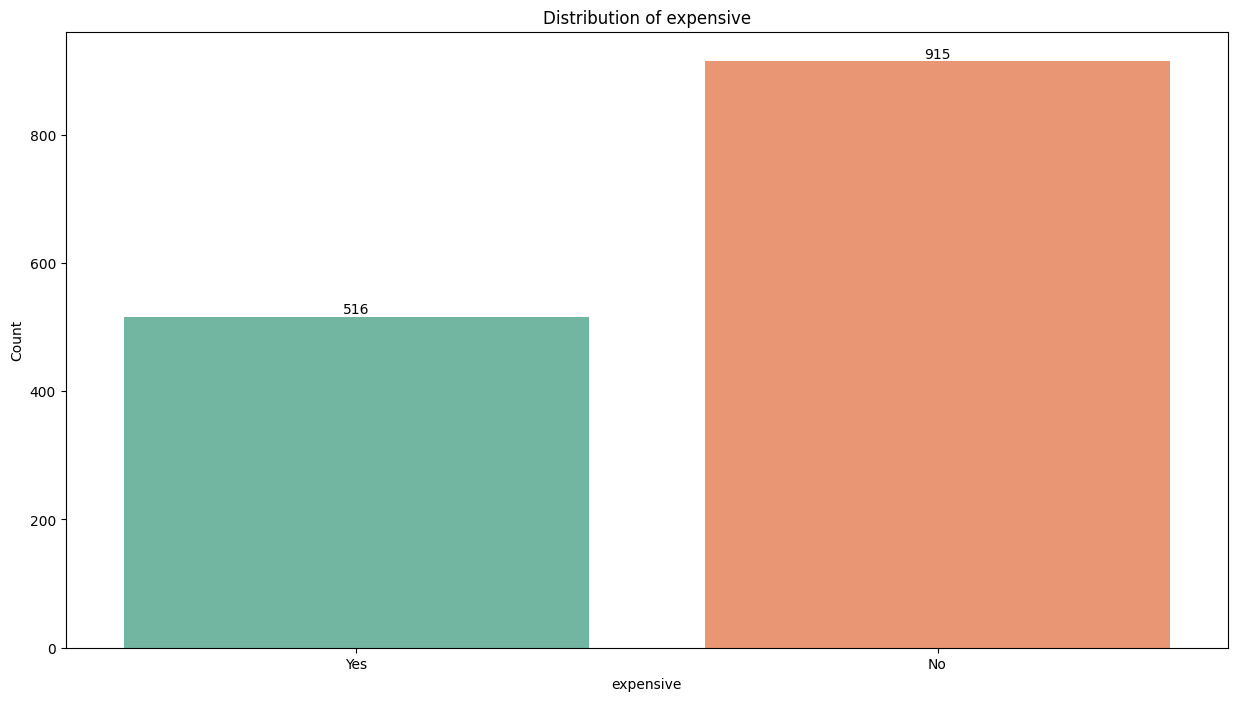

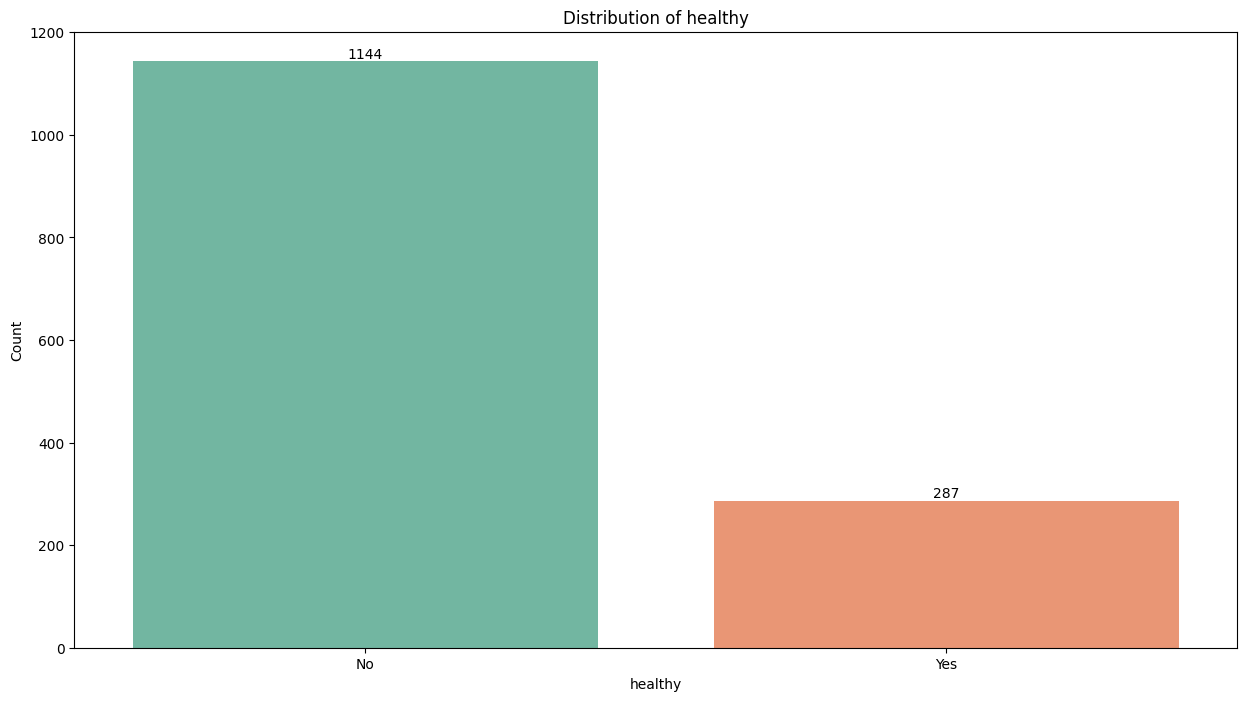

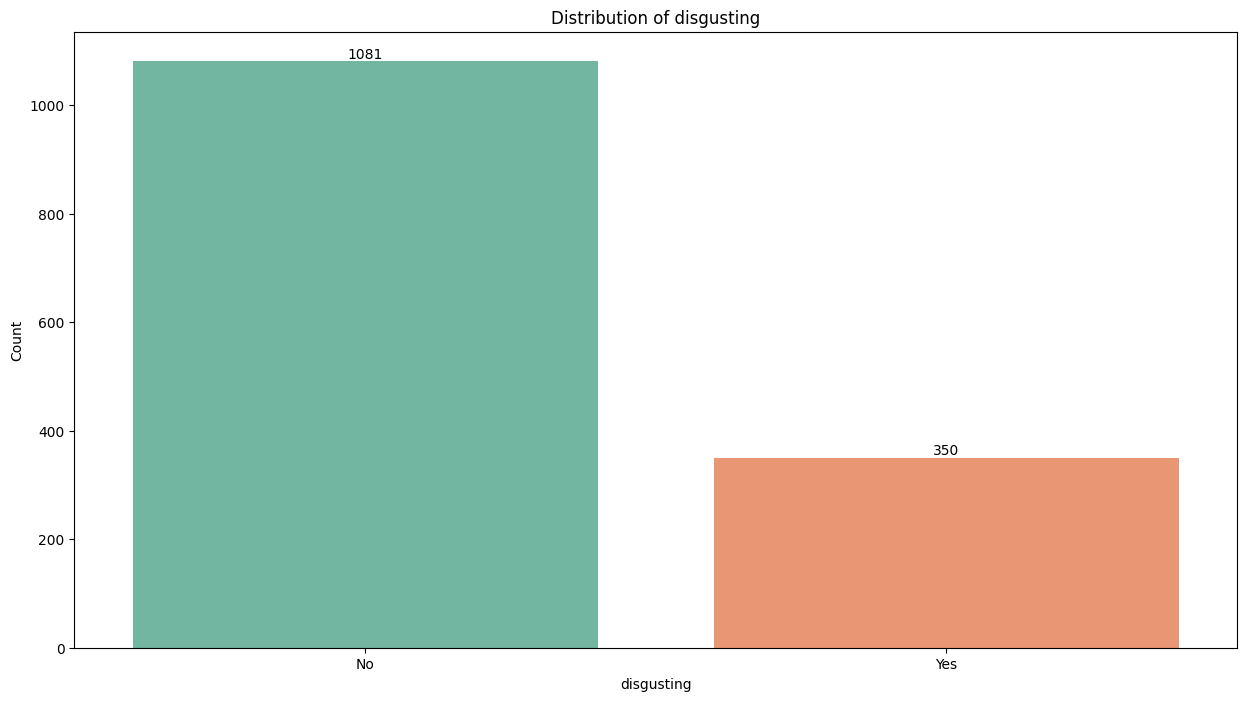

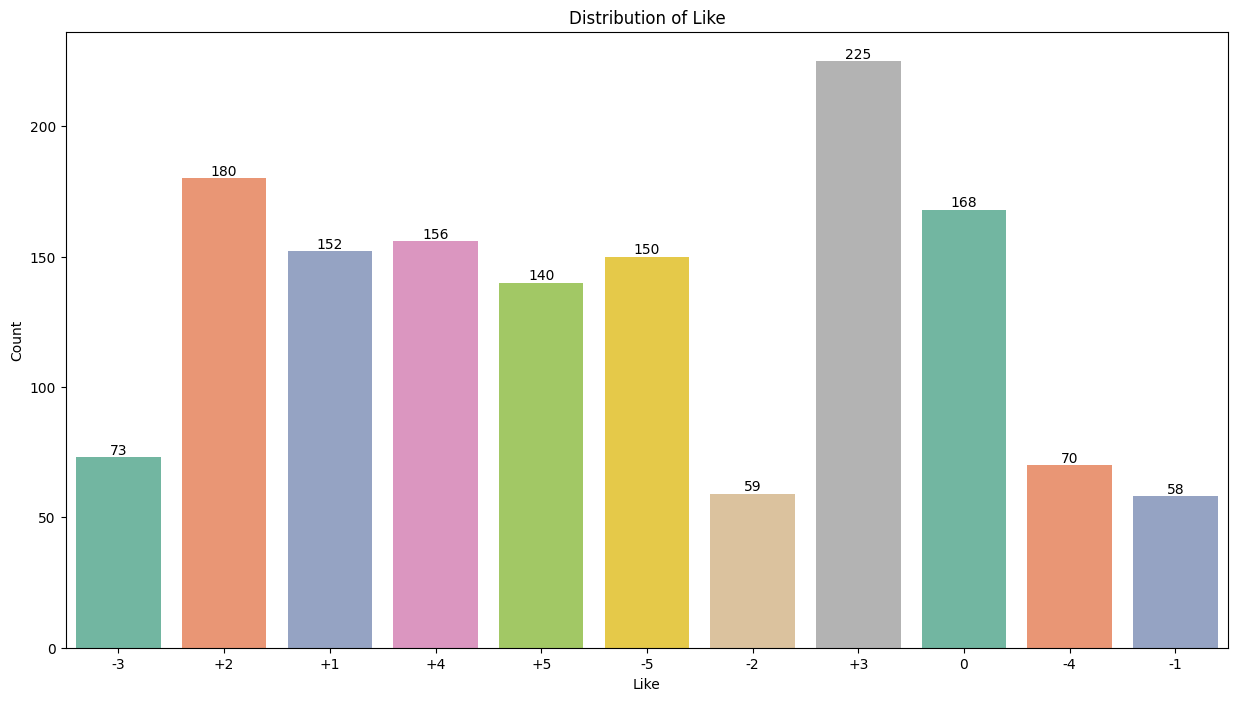

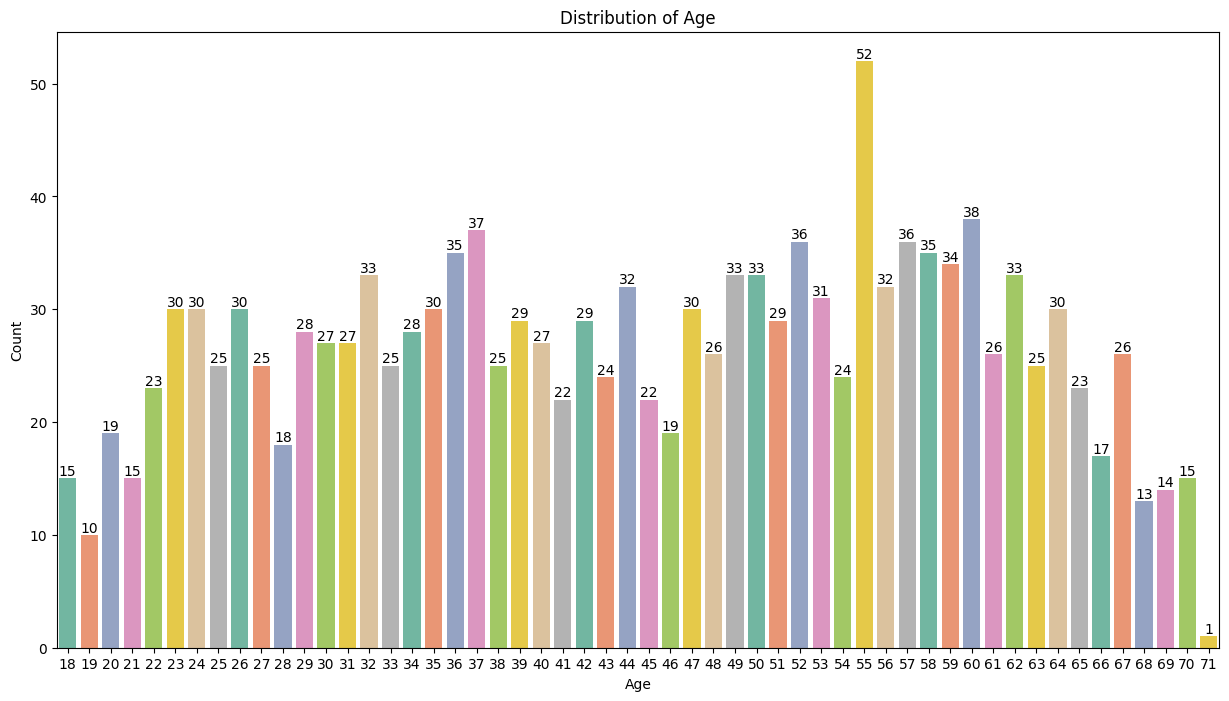

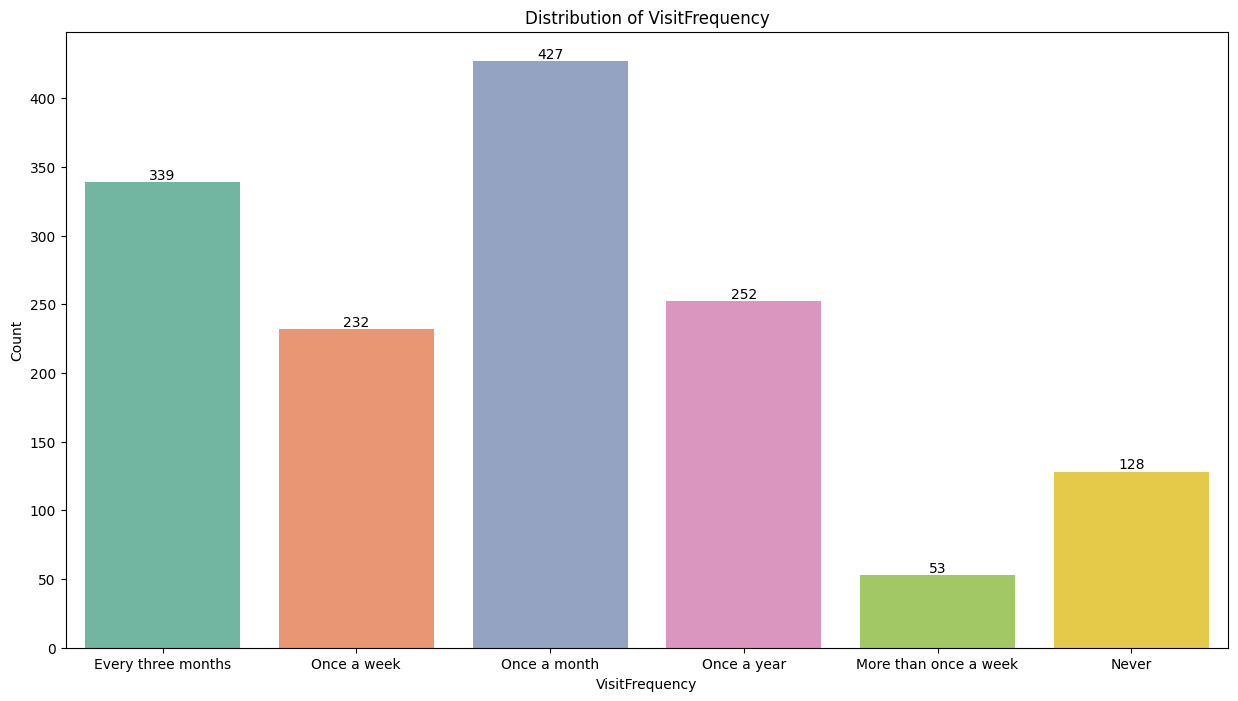

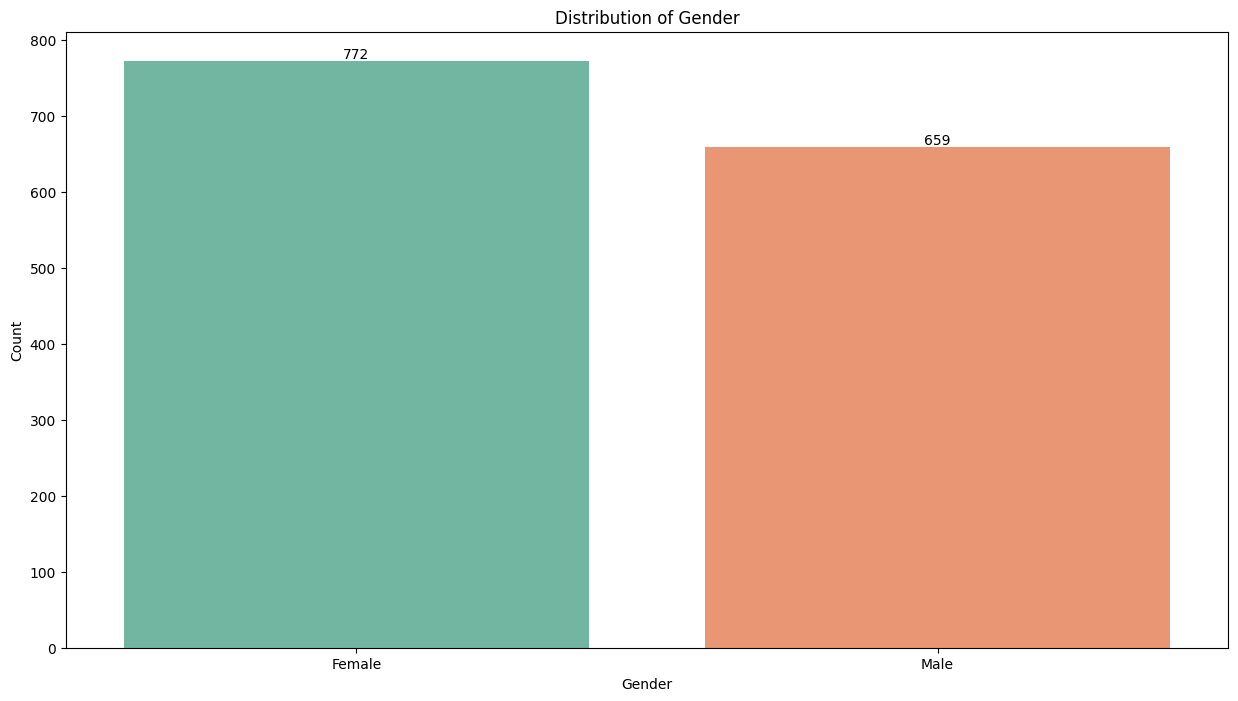

In [13]:
# Set the figure size globally
plt.rcParams['figure.figsize'] = (15, 8)

# Loop through each column in the DataFrame and create a count plot
for col in df.columns:
    plt.figure()  
    f = sns.countplot(x=df[col], hue=df[col], legend=False, palette="Set2") 
    for container in f.containers:
        f.bar_label(container)  # Annotate each bar with the count value
    
    plt.title(f'Distribution of {col}')  
    plt.xlabel(col)  
    plt.ylabel('Count')  
    plt.show()  
    print("\n")  


In [14]:
#Label encoding for categorical data
#Converting only starting 11 features data sample values from Yes to 1 and No to 0 
from sklearn.preprocessing import LabelEncoder
def labelling(x):
    df[x] = LabelEncoder().fit_transform(df[x])
    return df

cat = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']

for i in cat:
    labelling(i)
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male


In [15]:
#Considering only first 11 features(columns)
df_1 = df.loc[:,cat]
df_1

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [16]:
x = df.loc[:,cat].values
x

array([[0, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 1, 0, 0],
       [0, 1, 1, ..., 1, 1, 0],
       ...,
       [1, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 1, 0, 1]])

### PCA

In [17]:
#Principal component analysis
from sklearn.decomposition import PCA
from sklearn import preprocessing

MD_pca = preprocessing.scale(x)

pca = PCA(n_components=11)
pc = pca.fit_transform(x)
names = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11']
pf = pd.DataFrame(data = pc, columns = names)
pf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,-0.419114,0.231691,-0.660553,-0.394399,-0.200925,0.391549,-0.213729,-0.167607,-0.179510,-0.531101,0.554209
1,0.220189,-0.393341,0.729516,-0.102505,-0.043964,0.085099,-0.095786,0.034779,-0.110699,-0.507822,0.487602
2,-0.371455,-0.728362,0.124168,0.683734,-0.849209,0.677356,0.581753,-0.364017,0.327911,-0.050151,-0.243132
3,0.179665,0.345683,0.851313,0.204693,0.680349,0.036688,-0.056524,0.232855,0.024518,0.247991,0.056664
4,-0.173971,0.808123,-0.016911,0.545781,-0.860236,0.083213,-0.456052,-0.164836,0.073457,-0.027998,-0.081264
...,...,...,...,...,...,...,...,...,...,...,...
1426,-1.547013,-0.263928,0.014192,0.201105,0.146572,-0.309209,-0.076867,-0.344021,0.136215,0.419146,0.464879
1427,0.963333,-0.018977,-0.298754,0.445180,0.134964,-0.391248,-0.330860,-0.870713,0.305065,0.240094,0.197849
1428,0.182781,-1.057798,-0.229392,-0.470739,0.191532,0.199227,-0.093868,0.033670,-0.039346,-0.057964,0.012160
1429,1.188787,0.033521,-0.555086,0.696727,-0.047700,-0.195972,-0.024075,0.345070,-0.023337,0.000024,0.107268


In [18]:
loadings = pca.components_
num_pc = loadings.shape[1]
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = df_1.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
variable,,,,,,,,,,,
yummy,0.473652,-0.370610,0.301355,0.053818,0.307839,-0.170267,-0.278457,-0.012604,-0.574230,0.107604,-0.042649
convenient,0.155302,-0.016830,0.062892,-0.144547,-0.276766,0.343663,-0.060092,0.108304,0.015511,0.652477,0.561015
spicy,0.007448,-0.019080,0.039472,0.199271,-0.073973,0.353279,0.707035,-0.381458,-0.395773,0.079203,-0.140418
fattening,-0.116058,0.034366,0.322261,-0.349149,0.069891,0.403426,-0.392024,-0.590763,0.160342,0.011932,-0.251830
greasy,-0.303698,0.057601,0.802992,0.245048,-0.362733,-0.215346,0.038995,0.141622,0.002631,-0.008337,-0.001655
fast,0.109396,0.086865,0.065928,-0.097602,-0.112772,0.598702,-0.085239,0.625020,-0.168059,-0.228139,-0.342411
cheap,0.341107,0.606855,0.155916,0.123186,0.127236,0.101218,-0.040913,-0.140513,-0.073985,-0.441522,0.477097
tasty,0.469349,-0.312024,0.285723,-0.006973,0.211855,0.079163,0.357405,0.073368,0.640410,-0.075988,-0.022303
expensive,-0.333174,-0.598525,-0.028200,0.068841,0.000381,0.262920,-0.067548,-0.031604,-0.064168,-0.466890,0.477950


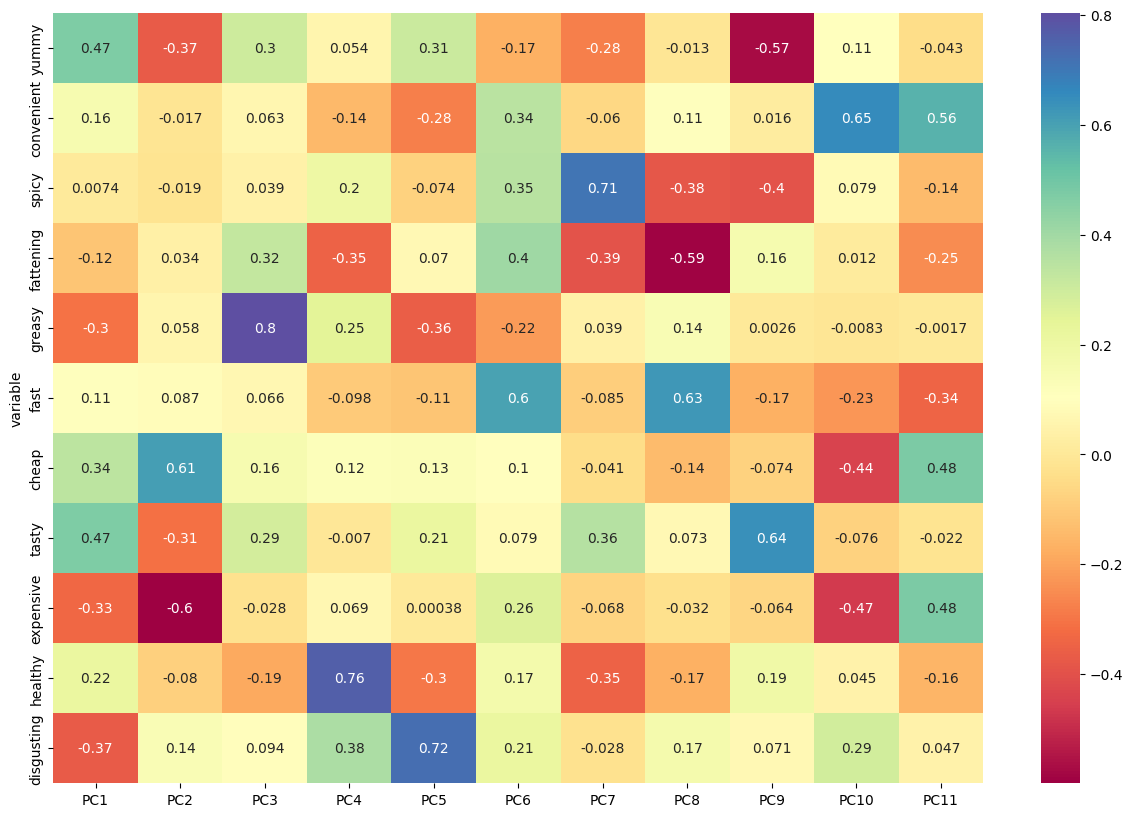

In [19]:
#Correlation matrix plot for loadings 
plt.rcParams['figure.figsize'] = (15,10)
ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()

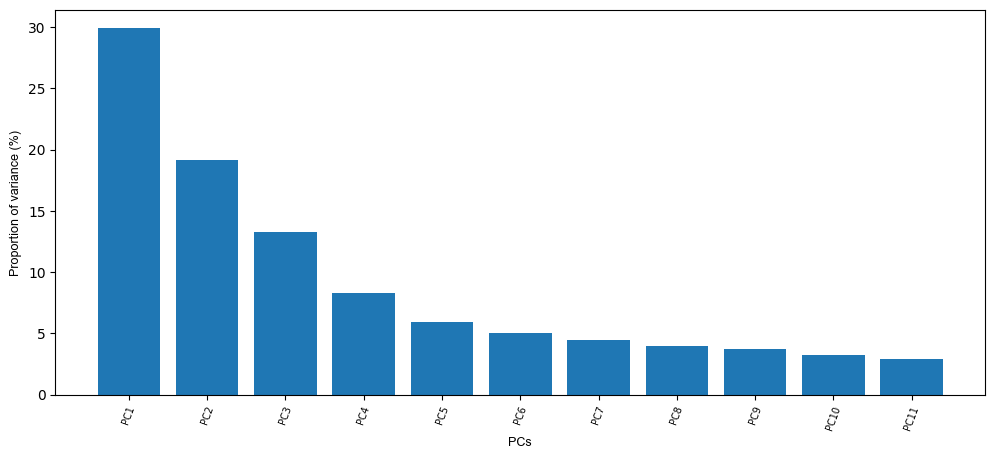

In [22]:
from bioinfokit.visuz import cluster
cluster.screeplot(obj=[pc_list, pca.explained_variance_ratio_],show=True,dim=(12,5))

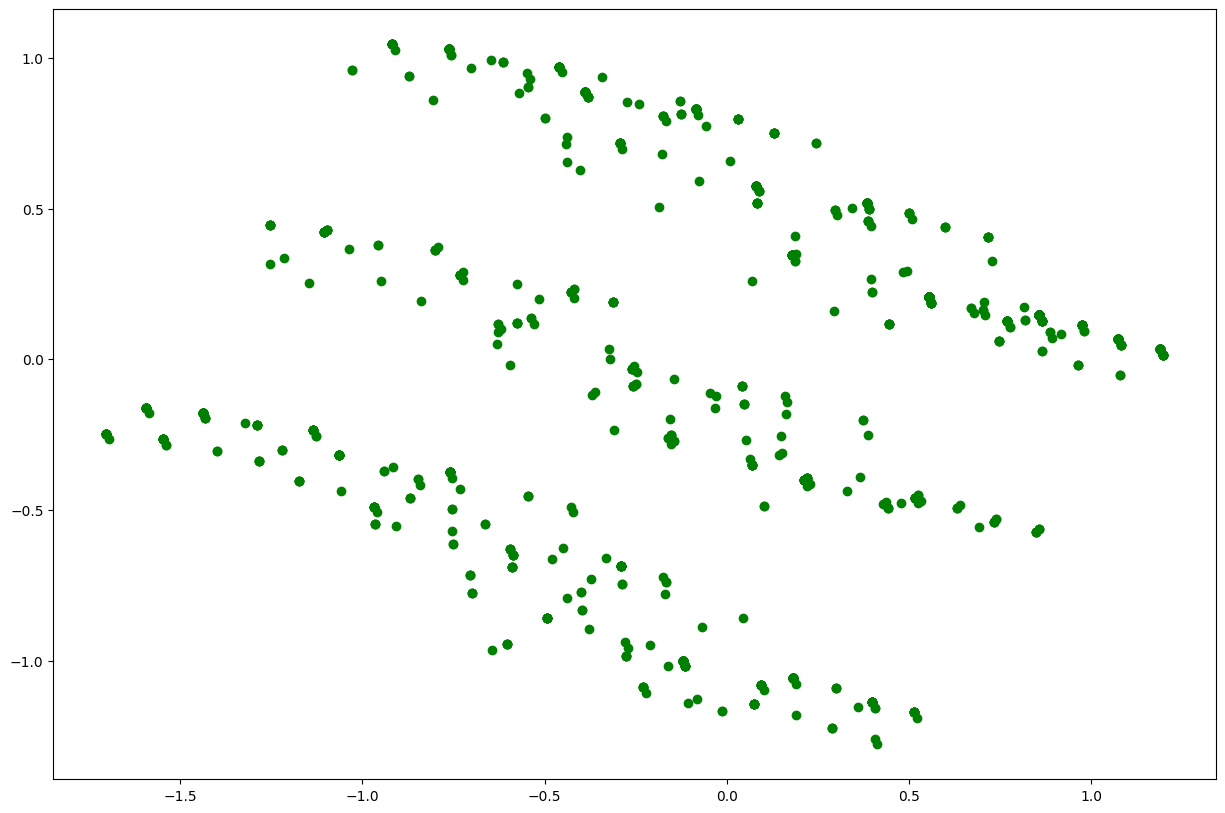

In [24]:
# plot the PCA scores
plt.scatter(pca.fit_transform(df_1)[:, 0], pca.transform(df_1)[:, 1], color="green")

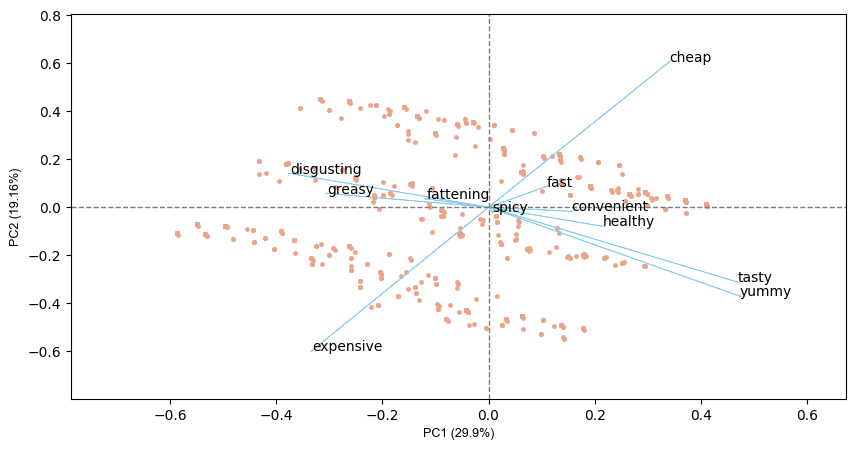

In [25]:
# get PC scores
pca_scores = PCA().fit_transform(x)

# get 2D biplot
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=df.columns.values, var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(10,5))

# Extracting Segments

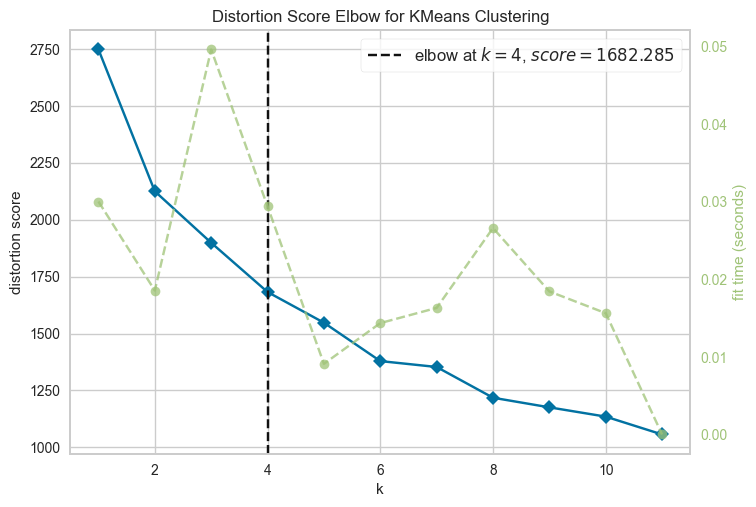

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [28]:
#Extracting segments

#Using k-means clustering analysis
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(df_1)
visualizer.show()

In [29]:
#K-means clustering 

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df_1)
df['cluster_num'] = kmeans.labels_ #adding to df
print (kmeans.labels_) #Label assigned for each data point
print (kmeans.inertia_) #gives within-cluster sum of squares. 
print(kmeans.n_iter_) #number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print(kmeans.cluster_centers_) #Location of the centroids on each cluster. 

[0 1 1 ... 1 3 2]
1699.9995072731904
8
[[0.08421053 0.85789474 0.07894737 0.74210526 0.27894737 0.80526316
  0.10526316 0.22631579 0.60526316 0.14736842 0.14736842]
 [0.89491525 0.95932203 0.13898305 0.92542373 0.6779661  0.87457627
  0.11864407 0.95254237 0.93220339 0.21355932 0.16271186]
 [0.00837989 0.77094972 0.07541899 0.97486034 0.7849162  0.8603352
  0.67039106 0.06145251 0.32402235 0.04189944 0.69553073]
 [0.85544218 0.97959184 0.09013605 0.81122449 0.37414966 0.96428571
  0.94727891 0.9744898  0.0170068  0.30782313 0.04251701]]


In [30]:
#To see each cluster size
from collections import Counter
Counter(kmeans.labels_)

Counter({np.int32(3): 588,
         np.int32(2): 358,
         np.int32(1): 295,
         np.int32(0): 190})

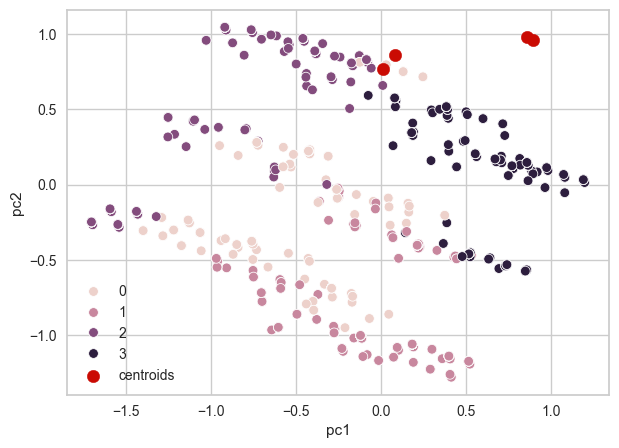

In [50]:
#Visulazing clusters
sns.scatterplot(data=pf, x="pc1", y="pc2", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="o", c="r", s=80, label="centroids")
plt.legend()
plt.show()

In [32]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import numpy as np
import matplotlib.pyplot as plt

In [33]:
# count the frequency of each value in the "Like" column
like_counts = df["Like"].value_counts()

# reverse the order of the resulting Series
like_counts = like_counts.iloc[::-1]

# print the results
print(like_counts)

Like
-1     58
-2     59
-4     70
-3     73
+5    140
-5    150
+1    152
+4    156
0     168
+2    180
+3    225
Name: count, dtype: int64


In [34]:
df["Like.n"] = 6 - pd.to_numeric(df["Like"], errors="coerce")

# count the frequency of each value in the "Like.n" column
like_n_counts = df["Like.n"].value_counts()

# print the results
print(like_n_counts)

Like.n
3     225
4     180
6     168
2     156
5     152
11    150
1     140
9      73
10     70
8      59
7      58
Name: count, dtype: int64


# Proffiling Segments

In [35]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage

In [36]:
# compute the pairwise distances between the columns of df_1
D = np.transpose(df_1)
D = linkage(D, method = "average")

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [25.0, 25.0, 42.5, 42.5],
  [10.0, 10.0, 33.75, 33.75],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [75.0, 75.0, 92.5, 92.5],
  [65.0, 65.0, 83.75, 83.75],
  [21.875, 21.875, 74.375, 74.375]],
 'dcoord': [[0.0,
   np.float64(15.132745950421556),
   np.float64(15.132745950421556),
   0.0],
  [0.0, np.float64(13.784048752090222), np.float64(13.784048752090222), 0.0],
  [0.0,
   np.float64(16.76281577344289),
   np.float64(16.76281577344289),
   np.float64(13.784048752090222)],
  [0.0,
   np.float64(23.56716713364229),
   np.float64(23.56716713364229),
   np.float64(16.76281577344289)],
  [np.float64(15.132745950421556),
   np.float64(23.968548145468752),
   np.float64(23.968548145468752),
   np.float64(23.56716713364229)],
  [0.0, np.float64(18.24828759089466), np.float64(18.24828759089466), 0.0],
  [0.0,
   np.float64(22.172201406011716),
   np.float64(22.172201406011716),
   

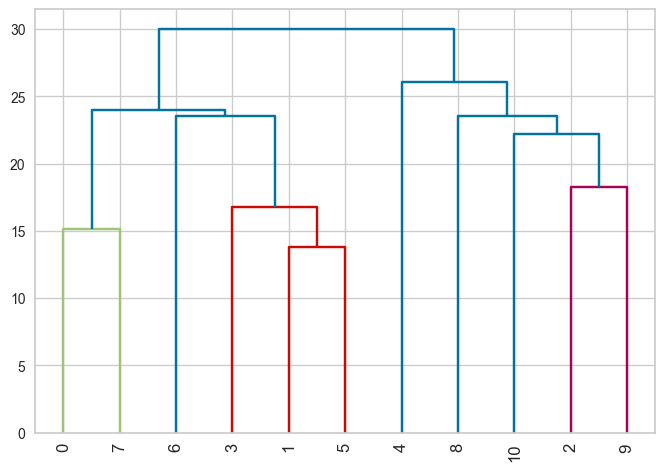

In [37]:
# plot the dendrogram
dendrogram(D, truncate_mode = "lastp", p = 12, leaf_rotation = 90,
           leaf_font_size = 12, show_contracted = True)

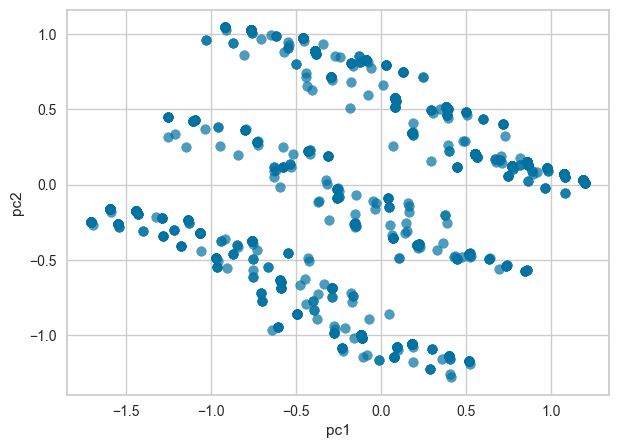

In [51]:
import matplotlib.pyplot as plt

# get the coordinates of the data projected onto the first two principal components
proj_data = pca.fit_transform(x)[:, :2]

# plot the scatter plot
plt.scatter(proj_data[:, 0], proj_data[:, 1], alpha=0.7)
plt.xlabel("pc1")
plt.ylabel("pc2")
plt.show()

# Describing Segments

In [39]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

crosstab =pd.crosstab(df['cluster_num'],df['Like'])
crosstab 

Like,+1,+2,+3,+4,+5,-1,-2,-3,-4,-5,0
cluster_num,,,,,,,,,,,
0,25,17,15,7,2,15,14,14,11,27,43
1,34,49,65,43,42,5,7,8,4,8,30
2,24,25,7,0,0,21,29,46,50,111,45
3,69,89,138,106,96,17,9,5,5,4,50


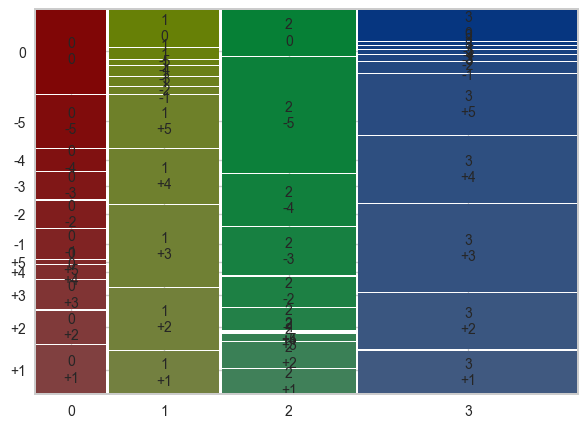

In [40]:
#MOSAIC PLOT
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab.stack())
plt.show()

In [41]:
#Mosaic plot gender vs segment
crosstab_gender =pd.crosstab(df['cluster_num'],df['Gender'])
crosstab_gender

Gender,Female,Male
cluster_num,,
0,87,103
1,143,152
2,187,171
3,355,233


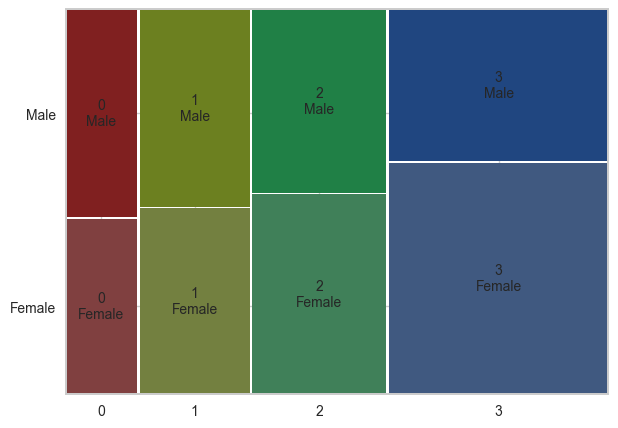

In [42]:
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab_gender.stack())
plt.show()

<Axes: xlabel='cluster_num', ylabel='Age'>

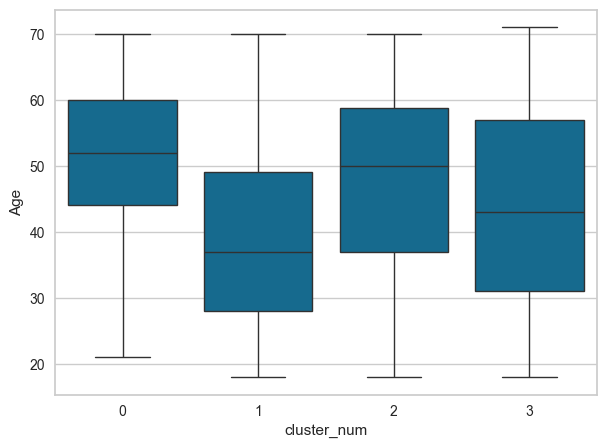

In [43]:
#box plot for age
sns.boxplot(x="cluster_num", y="Age", data=df)

# Selecting Market Segments

In [44]:
#Calculating the mean
#Visit frequency
df['VisitFrequency'] = LabelEncoder().fit_transform(df['VisitFrequency'])
visit = df.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.605263
1,1,2.586441
2,2,2.729050
3,3,2.624150


In [45]:
#Like
df['Like'] = LabelEncoder().fit_transform(df['Like'])
Like = df.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,5.757895
1,1,3.400000
2,2,6.952514
3,3,3.090136


In [54]:
#Gender
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
Gender = df.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.542105
1,1,0.515254
2,2,0.477654
3,3,0.396259


In [47]:
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment

,cluster_num,Gender,Like,VisitFrequency
0,0,0.542105,5.757895,2.605263
1,1,0.515254,3.400000,2.586441
2,2,0.477654,6.952514,2.729050
3,3,0.396259,3.090136,2.624150


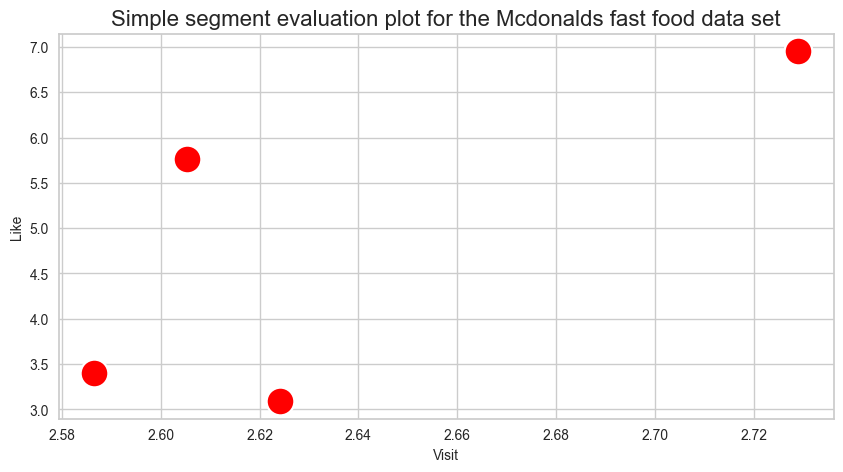

In [49]:
#Target segments

plt.figure(figsize = (10,5))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400, color="red")
plt.title("Simple segment evaluation plot for the Mcdonalds fast food data set",
          fontsize = 16) 
plt.xlabel("Visit", fontsize = 10) 
plt.ylabel("Like", fontsize = 10) 
plt.show()